## BT4211 Group 9 Hotel Project 

### Jupyter Notebook to: 
- ML Regression Task to predict Total Revenue
    - $\frac{Confirmed+NoShow}{Total Bookings} \rightarrow$ RATIO

$(Lodging Revenue Per Room + Other Revenue Per Room) \times RATIO = Total Revenue Per Room$

### Project Setup 

In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from dython.nominal import associations

In [668]:
np.random.seed(4211)

In [669]:
# Read in cleaned dataset 
hotel_df = pd.read_csv("HotelCustomersDataset_Cleaned.csv")
hotel_df.drop("Unnamed: 0", axis=1, inplace= True) # Drop the weird 1st index column
hotel_df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,1,0,0,0,0
1,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,1,0,0,0,0,0,0,1
3,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75392,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,...,0,0,1,0,0,0,0,0,1,0
75393,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
75394,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,1,0,0,0,0,0,1,0
75395,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0


In [670]:
hotel_df.dtypes

ID                                               int64
Nationality                                     object
Age                                            float64
DaysSinceCreation                                int64
NameHash                                        object
DocIDHash                                       object
AverageLeadTime                                  int64
LodgingRevenue                                 float64
OtherRevenue                                   float64
BookingsCanceled                                 int64
BookingsNoShowed                                 int64
BookingsCheckedIn                                int64
PersonsNights                                    int64
RoomNights                                       int64
DaysSinceLastStay                                int64
DaysSinceFirstStay                               int64
SRHighFloor                                      int64
SRLowFloor                                       int64
SRAccessib

### Further Pre-processing

In [671]:
# Drop the ID, Nationality, Name Hash and DocID Hash 
hotel_df.drop(columns = ["ID", "Nationality", "NameHash", "DocIDHash"], inplace = True)

In [685]:
# Creating the Ratio Metric needed as one of our dependent variable
hotel_df["Ratio"] = (hotel_df["BookingsCheckedIn"] + hotel_df["BookingsNoShowed"]) / \
    (hotel_df["BookingsCheckedIn"] + hotel_df["BookingsNoShowed"] + hotel_df["BookingsCanceled"])

# NaNs are referring to those who have never stayed and made booking with the hotel before 
# For prediction task we can only use those who have previously at least made booking before
# hotel_df_hasbooked = hotel_df.dropna(subset=["Ratio"])
# hotel_df_hasbooked = hotel_df_hasbooked.reset_index()
# hotel_df_hasbooked.drop("index", axis=1, inplace=True)
# Drop rows for guests i.e. days since last and first stay are -1 but there's room information
room_chars_cols = [col for col in hotel_df.columns.tolist() if col.startswith('SR')]
hotel_df['room_chars_sum'] = hotel_df.loc[:,room_chars_cols].sum(axis=1)

#filter df to get only guests
def filter(df, **kwargs):
    query_list = []
    for key in kwargs.keys():
        if key.startswith('room'):
            query_list.append(f'{key}!={kwargs[key]}')
        else:
            query_list.append(f'{key}=={kwargs[key]}')
    print(query_list)
    query = ' & '.join(query_list)
    return df.query(query)
guest_df_to_drop = filter(hotel_df, room_chars_sum = 0, DaysSinceLastStay = -1, DaysSinceFirstStay = -1)
guest_idx_to_drop = guest_df_to_drop.index.to_list()
hotel_df_no_guests =  hotel_df.drop(guest_idx_to_drop)
hotel_df_no_guests['Ratio'].isna().sum() # 6189
hotel_df_no_guests['DaysSinceLastStay'].eq(-1).sum() #6190 this one dude cancelled 2 bookings and had thus ratio of 0 = 0/2
hotel_df_no_guests['Ratio'].eq(0).sum() # 1 just one instance of this happening
# impute guests with nan ratio with 1
hotel_df_no_guests['Ratio'] = hotel_df_no_guests['Ratio'].fillna(1)
hotel_df_hasbooked = hotel_df_no_guests #Change name later
hotel_df_hasbooked

['room_chars_sum!=0', 'DaysSinceLastStay==-1', 'DaysSinceFirstStay==-1']


0        0.75
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
75390    1.00
75392    1.00
75393    1.00
75394    1.00
75396    1.00
Name: Ratio, Length: 65976, dtype: float64

In [673]:
# Creating average revenue metrics 

# Create Average Lodging Revenue
hotel_df_hasbooked["AverageLodgingRevenue"] = hotel_df_hasbooked["LodgingRevenue"] / \
    ((hotel_df_hasbooked["BookingsCheckedIn"] +
     hotel_df_hasbooked["BookingsNoShowed"]))

# Create Average Other Revenue
hotel_df_hasbooked["AverageOtherRevenue"] = hotel_df_hasbooked["OtherRevenue"] / \
    ((hotel_df_hasbooked["BookingsCheckedIn"] +
     hotel_df_hasbooked["BookingsNoShowed"]))

# Create Average Total Revenue
hotel_df_hasbooked["TotalRevenuePerRoom"] = (
    hotel_df_hasbooked["AverageLodgingRevenue"] + hotel_df_hasbooked["AverageOtherRevenue"]) * hotel_df_hasbooked["Ratio"]

# Remove the average lodging revenue and average other revenue as we cannot use these metrics to predict (collinearity) 
hotel_df_hasbooked.drop(
    columns=["AverageLodgingRevenue", "AverageOtherRevenue"], axis=1, inplace=True)

# Remove those with average lodging revenue as 0
hotel_df_hasbooked = hotel_df_hasbooked[hotel_df_hasbooked["TotalRevenuePerRoom"] > 0]


In [674]:
# Normalisation of the appropriate numeric columns 
scaled_columns = ["Age", "DaysSinceCreation", "AverageLeadTime", "LodgingRevenue",
                  "OtherRevenue", "Ratio", "PersonsNights", "RoomNights", "DaysSinceLastStay", "DaysSinceFirstStay"]

# Scale using Sklearn Normalizer
hotel_df_hasbooked_norm = hotel_df_hasbooked.copy()
scaler = preprocessing.Normalizer()
hotel_df_hasbooked_norm[scaled_columns] = scaler.fit_transform(
    hotel_df_hasbooked_norm[scaled_columns])
hotel_df_hasbooked_norm

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Ratio,room_chars_sum,TotalRevenuePerRoom
0,0.043858,0.128993,0.038698,0.319044,0.090553,1,0,3,0.006880,0.004300,...,0,0,1,0,0,0,0,0.000645,0,119.075
2,0.031224,0.569834,0.048397,0.124895,0.031224,0,0,1,0.005204,0.002602,...,0,0,0,0,0,0,1,0.000520,0,300.000
4,0.028205,0.571927,0.030294,0.120131,0.012535,0,0,1,0.002089,0.001045,...,0,0,0,0,0,1,0,0.000522,0,254.000
6,0.016169,0.553293,0.019201,0.270330,0.047497,0,0,1,0.005053,0.002526,...,0,0,0,0,0,1,0,0.000505,1,629.000
8,0.013076,0.572745,0.050213,0.091011,0.036091,0,0,1,0.003138,0.001569,...,0,0,0,0,0,0,1,0.000523,0,243.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75388,0.204084,0.000000,0.085035,0.748306,0.625006,0,0,1,0.017007,0.008503,...,0,0,0,0,0,1,0,0.004252,0,323.000
75390,0.277662,0.000000,0.515657,0.810319,0.011333,0,0,1,0.011333,0.005667,...,0,0,0,0,0,1,0,0.005667,1,145.000
75392,0.138529,0.000000,0.309026,0.897507,0.281054,0,0,1,0.021312,0.010656,...,0,0,0,0,0,1,0,0.002664,0,442.400
75394,0.105583,0.000000,0.244864,0.734816,0.623391,0,0,1,0.013479,0.006739,...,0,0,0,0,0,1,0,0.002246,1,604.600


<AxesSubplot:>

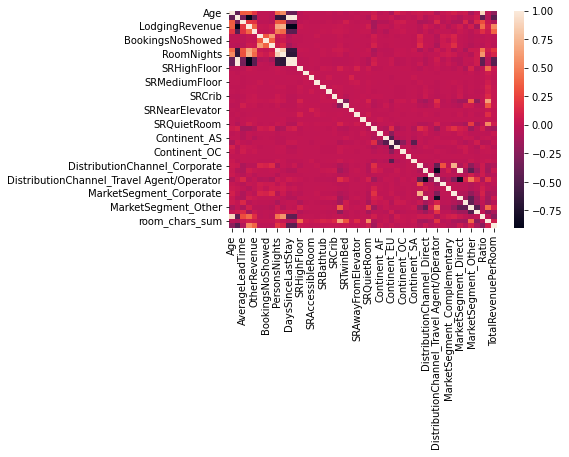

In [675]:
# Create corr heatmap 
corr = hotel_df_hasbooked_norm.corr()
sns.heatmap(corr)

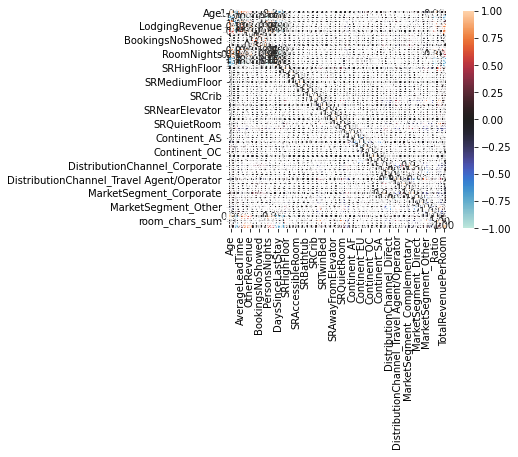

{'corr':                                                   Age  DaysSinceCreation  \
 Age                                          1.000000          -0.730383   
 DaysSinceCreation                           -0.730383           1.000000   
 AverageLeadTime                              0.705512          -0.676122   
 LodgingRevenue                               0.696787          -0.993258   
 OtherRevenue                                 0.565569          -0.857877   
 BookingsCanceled                            -0.026002          -0.032254   
 BookingsNoShowed                            -0.032319          -0.015769   
 BookingsCheckedIn                            0.005715          -0.092084   
 PersonsNights                                0.764381          -0.938258   
 RoomNights                                   0.834926          -0.938223   
 DaysSinceLastStay                           -0.726217           0.998456   
 DaysSinceFirstStay                          -0.728158           0.9

In [676]:
associations(corr)

### Remove Random Sample of 100 to mimic the 100 new customers 

In [677]:
newcust_df = hotel_df_hasbooked_norm.sample(100)
hotel_df_hasbooked_norm.drop(newcust_df.index, inplace=True)
hotel_df_hasbooked_norm


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Ratio,room_chars_sum,TotalRevenuePerRoom
0,0.043858,0.128993,0.038698,0.319044,0.090553,1,0,3,0.006880,0.004300,...,0,0,1,0,0,0,0,0.000645,0,119.075
2,0.031224,0.569834,0.048397,0.124895,0.031224,0,0,1,0.005204,0.002602,...,0,0,0,0,0,0,1,0.000520,0,300.000
4,0.028205,0.571927,0.030294,0.120131,0.012535,0,0,1,0.002089,0.001045,...,0,0,0,0,0,1,0,0.000522,0,254.000
6,0.016169,0.553293,0.019201,0.270330,0.047497,0,0,1,0.005053,0.002526,...,0,0,0,0,0,1,0,0.000505,1,629.000
8,0.013076,0.572745,0.050213,0.091011,0.036091,0,0,1,0.003138,0.001569,...,0,0,0,0,0,0,1,0.000523,0,243.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75388,0.204084,0.000000,0.085035,0.748306,0.625006,0,0,1,0.017007,0.008503,...,0,0,0,0,0,1,0,0.004252,0,323.000
75390,0.277662,0.000000,0.515657,0.810319,0.011333,0,0,1,0.011333,0.005667,...,0,0,0,0,0,1,0,0.005667,1,145.000
75392,0.138529,0.000000,0.309026,0.897507,0.281054,0,0,1,0.021312,0.010656,...,0,0,0,0,0,1,0,0.002664,0,442.400
75394,0.105583,0.000000,0.244864,0.734816,0.623391,0,0,1,0.013479,0.006739,...,0,0,0,0,0,1,0,0.002246,1,604.600


### Determining Appropriate Variables to use for Prediction Task

RFE for Average Total Revenue

In [678]:
# Find appropriate variables using Recursive Feature Engineering (RFE)
rfe = feature_selection.RFE(
    estimator=tree.DecisionTreeRegressor(), n_features_to_select=10)

rfe.fit(hotel_df_hasbooked_norm.drop(
    columns=["Ratio", "OtherRevenue", "TotalRevenuePerRoom", "room_chars_sum"]), hotel_df_hasbooked_norm["TotalRevenuePerRoom"])

selected_features_df = hotel_df_hasbooked_norm.drop(
    columns=["Ratio", "OtherRevenue", "TotalRevenuePerRoom", "room_chars_sum"]).loc[:, rfe.support_]

selected_features_df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,MarketSegment_Other
0,0.043858,0.128993,0.038698,0.319044,3,0.006880,0.004300,0.129853,0.923592,0
2,0.031224,0.569834,0.048397,0.124895,1,0.005204,0.002602,0.572435,0.572435,0
4,0.028205,0.571927,0.030294,0.120131,1,0.002089,0.001045,0.572971,0.572971,1
6,0.016169,0.553293,0.019201,0.270330,1,0.005053,0.002526,0.555819,0.555819,1
8,0.013076,0.572745,0.050213,0.091011,1,0.003138,0.001569,0.574314,0.574314,0
...,...,...,...,...,...,...,...,...,...,...
75388,0.204084,0.000000,0.085035,0.748306,1,0.017007,0.008503,0.008503,0.008503,1
75390,0.277662,0.000000,0.515657,0.810319,1,0.011333,0.005667,0.005667,0.005667,1
75392,0.138529,0.000000,0.309026,0.897507,1,0.021312,0.010656,0.010656,0.010656,1
75394,0.105583,0.000000,0.244864,0.734816,1,0.013479,0.006739,0.006739,0.006739,1


### Regression Prediction Task

In [679]:
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df,
    hotel_df_hasbooked_norm["TotalRevenuePerRoom"],
    test_size=0.2,
    random_state=42)

In [680]:
# Create Linear Regressor model
linreg_regressor = linear_model.LinearRegression()

# Fit the model to the training data
linreg_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = linreg_regressor.predict(X_test)

# Calculate performance metrics
linreg_regressor.score(X_test, y_test)

0.5194514763595942

In [681]:
# Create Decision Tree Regressor model
dt_regressor = tree.DecisionTreeRegressor()

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = dt_regressor.predict(X_test)

# Calculate performance metrics
dt_regressor.score(X_test, y_test)


0.7332079198622687

### Calculating estimated Revenue in Next Period

In [682]:
# Predict total revenue per room
pred_rev = dt_regressor.predict(newcust_df[selected_features_df.columns])
newcust_df["TotalRevenuePerRoom_Pred"] = pred_rev 

In [683]:
# Assuming everyone just booked 1 room, find total revenue for that month
sum_pred_revenue = newcust_df['TotalRevenuePerRoom_Pred'].sum()
sum_pred_revenue

45632.4

Other things we can consider: 
Doing PCA? But need to find a reason to do it? 